In [4]:
#Imports the Pandas library for data manipulation and analysis.
import pandas as pd
# Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
%matplotlib inline
#Imports the NumPy library for numerical computations.
import numpy as np

# It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns 

In [5]:
#line of code reads a CSV file named insurance.csv located in the Dataset directory into a pandas DataFrame called df.
df=pd.read_csv('Dataset/nyka_top_brands_cosmetics_product_reviews.csv')
#Prints the first few rows of the DataFrame
df.head()

product_id brand_name  review_id                         review_title  \
0      781070       Olay   16752142                 Worth buying 50g one   
1      781070       Olay   14682550           Best cream to start ur day   
2      781070       Olay   15618995  perfect for summers dry for winters   
3      781070       Olay   13474509                    Not a moisturizer   
4      781070       Olay   16338982                              Average   

                                         review_text          author  \
0  Works as it claims. Could see the difference f...   Ashton Dsouza   
1  It does what it claims . Best thing is it smoo...    Amrit Neelam   
2  I have been using this product for months now....    Sanchi Gupta   
3  i have an oily skin, while this whip acts as a...      Ruchi Shah   
4  It's not that good. Please refresh try for oth...  Sukanya Sarkar   

           review_date  review_rating  is_a_buyer  pro_user    review_label  \
0  2021-01-23 15:17:18            5.0        True     False  Verified Buyer   
1  2020-09-07 15:30:42            5.0        True     False  Verified Buyer   
2  2020-11-13 12:24:14            4.0        True     False  Verified Buyer   
3  2020-06-14 11:56:50            3.0        True     False  Verified Buyer   
4  2020-12-22 15:24:35            2.0        True     False  Verified Buyer   

                                       product_title   mrp  price  \
0  Olay Ultra Lightweight Moisturiser: Luminous W...  1999   1599   
1  Olay Ultra Lightweight Moisturiser: Luminous W...  1999   1599   
2  Olay Ultra Lightweight Moisturiser: Luminous W...  1999   1599   
3  Olay Ultra Lightweight Moisturiser: Luminous W...  1999   1599   
4  Olay Ultra Lightweight Moisturiser: Luminous W...  1999   1599   

   product_rating  product_rating_count product_tags  \
0             4.1                    43          NaN   
1             4.1                    43          NaN   
2             4.1                    43          NaN   
3             4.1                    43          NaN   
4             4.1                    43          NaN   

                                         product_url  
0  https://www.nykaa.com/olay-ultra-lightweight-m...  
1  https://www.nykaa.com/olay-ultra-lightweight-m...  
2  https://www.nykaa.com/olay-ultra-lightweight-m...  
3  https://www.nykaa.com/olay-ultra-lightweight-m...  
4  https://www.nykaa.com/olay-ultra-lightweight-m...

In [6]:
df.shape

(61284, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61284 entries, 0 to 61283
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            61284 non-null  int64  
 1   brand_name            61284 non-null  object 
 2   review_id             61284 non-null  int64  
 3   review_title          61284 non-null  object 
 4   review_text           61275 non-null  object 
 5   author                61284 non-null  object 
 6   review_date           61284 non-null  object 
 7   review_rating         61283 non-null  float64
 8   is_a_buyer            61284 non-null  bool   
 9   pro_user              61284 non-null  bool   
 10  review_label          48249 non-null  object 
 11  product_title         61284 non-null  object 
 12  mrp                   61284 non-null  int64  
 13  price                 61284 non-null  int64  
 14  product_rating        61284 non-null  float64
 15  product_rating_coun

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns

print("Categorical/Text Columns:", categorical_cols)

Categorical/Text Columns: Index(['brand_name', 'review_title', 'review_text', 'author', 'review_date',
       'review_label', 'product_title', 'product_tags', 'product_url'],
      dtype='object')


In [9]:
df.isnull().sum()

product_id                  0
brand_name                  0
review_id                   0
review_title                0
review_text                 9
author                      0
review_date                 0
review_rating               1
is_a_buyer                  0
pro_user                    0
review_label            13035
product_title               0
mrp                         0
price                       0
product_rating              0
product_rating_count        0
product_tags            47782
product_url                 0
dtype: int64

In [10]:
df['product_tags'].unique()

array([nan, 'FEATURED', 'BESTSELLER', 'FEATURED, BESTSELLER', 'NEW',
       'FEATURED, NEW'], dtype=object)

In [11]:
df['review_label'].unique()

array(['Verified Buyer', nan, 'Verified Professional'], dtype=object)

In [12]:
value_counts = df['review_label'].value_counts()
value_counts

review_label
Verified Buyer           47790
Verified Professional      459
Name: count, dtype: int64

In [13]:
value_counts = df['is_a_buyer'].value_counts()
value_counts

is_a_buyer
True     48222
False    13062
Name: count, dtype: int64

In [14]:
df['brand_name'].unique()

array(['Olay', 'Nykaa Naturals', 'Nykaa Cosmetics', 'Nivea',
       'NYX Professional Makeup', 'Maybelline New York', 'Lakme',
       "L'Oreal Paris", 'Kay Beauty', 'Herbal Essences', 'Colorbar'],
      dtype=object)

In [15]:
df['review_id'].unique()

array([16752142, 14682550, 15618995, ..., 17765866, 17761057, 25987603],
      dtype=int64)

In [16]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Nyka_top_brand Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
df.duplicated().sum()

0

In [18]:
df['review_date'] = pd.to_datetime(df['review_date'])

# Extract the year from the 'datetime' column
df['year'] = df['review_date'].dt.year

# Display the DataFrame
df

product_id       brand_name  review_id  \
0          781070             Olay   16752142   
1          781070             Olay   14682550   
2          781070             Olay   15618995   
3          781070             Olay   13474509   
4          781070             Olay   16338982   
...           ...              ...        ...   
61279     1044490  Herbal Essences   17769058   
61280     1044490  Herbal Essences   17766838   
61281     1044490  Herbal Essences   17765866   
61282     1044490  Herbal Essences   17761057   
61283     4633369         Colorbar   25987603   

                              review_title  \
0                     Worth buying 50g one   
1               Best cream to start ur day   
2      perfect for summers dry for winters   
3                        Not a moisturizer   
4                                  Average   
...                                    ...   
61279                                 Good   
61280                                Great   
61281                 Really mild and nice   
61282                     Amazing product!   
61283                             Not good   

                                             review_text          author  \
0      Works as it claims. Could see the difference f...   Ashton Dsouza   
1      It does what it claims . Best thing is it smoo...    Amrit Neelam   
2      I have been using this product for months now....    Sanchi Gupta   
3      i have an oily skin, while this whip acts as a...      Ruchi Shah   
4      It's not that good. Please refresh try for oth...  Sukanya Sarkar   
...                                                  ...             ...   
61279  I use this thrice a week. Has helped me in mak...         Radhesh   
61280  This shampoo has a amazing fragnance and textu...  Shalini Sirohi   
61281  Used it for the first time, feels really fresh...     Sana kanted   
61282  One of the best shampoo which are sulphate and...   neeru chouhan   
61283  It is so irritating so bad i don't like this much          Mssuhv   

              review_date  review_rating  is_a_buyer  pro_user  \
0     2021-01-23 15:17:18            5.0        True     False   
1     2020-09-07 15:30:42            5.0        True     False   
2     2020-11-13 12:24:14            4.0        True     False   
3     2020-06-14 11:56:50            3.0        True     False   
4     2020-12-22 15:24:35            2.0        True     False   
...                   ...            ...         ...       ...   
61279 2021-04-12 13:28:41            5.0        True     False   
61280 2021-04-12 11:47:07            5.0        True     False   
61281 2021-04-12 10:58:34            5.0        True     False   
61282 2021-04-11 21:44:55            5.0        True     False   
61283 2022-06-20 17:41:52            2.0       False     False   

         review_label                                      product_title  \
0      Verified Buyer  Olay Ultra Lightweight Moisturiser: Luminous W...   
1      Verified Buyer  Olay Ultra Lightweight Moisturiser: Luminous W...   
2      Verified Buyer  Olay Ultra Lightweight Moisturiser: Luminous W...   
3      Verified Buyer  Olay Ultra Lightweight Moisturiser: Luminous W...   
4      Verified Buyer  Olay Ultra Lightweight Moisturiser: Luminous W...   
...               ...                                                ...   
61279  Verified Buyer  Herbal Essences Aloe & Eucalyptus Shampoo For ...   
61280  Verified Buyer  Herbal Essences Aloe & Eucalyptus Shampoo For ...   
61281  Verified Buyer  Herbal Essences Aloe & Eucalyptus Shampoo For ...   
61282  Verified Buyer  Herbal Essences Aloe & Eucalyptus Shampoo For ...   
61283             NaN  Colorbar Mogra Mist - Scent Of An India Temple...   

        mrp  price  product_rating  product_rating_count product_tags  \
0      1999   1599             4.1                    43          NaN   
1      1999   1599             4.1                    43          NaN   
2      1999   1599         

In [19]:
df['review_date'] = pd.to_datetime(df['review_date'], format="%Y-%m-%d %H:%M:%S")

# Function to determine the time of day
def get_time_of_day(dt):
    if 5 <= dt.hour < 12:
        return "Morning"
    elif 12 <= dt.hour < 17:
        return "Afternoon"
    elif 17 <= dt.hour < 20:
         return "Evening"
    else:
        return "Night"

# Apply the function to each datetime entry in the DataFrame
df['time_of_day'] = df['review_date'].apply(get_time_of_day)
df

product_id       brand_name  review_id  \
0          781070             Olay   16752142   
1          781070             Olay   14682550   
2          781070             Olay   15618995   
3          781070             Olay   13474509   
4          781070             Olay   16338982   
...           ...              ...        ...   
61279     1044490  Herbal Essences   17769058   
61280     1044490  Herbal Essences   17766838   
61281     1044490  Herbal Essences   17765866   
61282     1044490  Herbal Essences   17761057   
61283     4633369         Colorbar   25987603   

                              review_title  \
0                     Worth buying 50g one   
1               Best cream to start ur day   
2      perfect for summers dry for winters   
3                        Not a moisturizer   
4                                  Average   
...                                    ...   
61279                                 Good   
61280                                Great   
61281                 Really mild and nice   
61282                     Amazing product!   
61283                             Not good   

                                             review_text          author  \
0      Works as it claims. Could see the difference f...   Ashton Dsouza   
1      It does what it claims . Best thing is it smoo...    Amrit Neelam   
2      I have been using this product for months now....    Sanchi Gupta   
3      i have an oily skin, while this whip acts as a...      Ruchi Shah   
4      It's not that good. Please refresh try for oth...  Sukanya Sarkar   
...                                                  ...             ...   
61279  I use this thrice a week. Has helped me in mak...         Radhesh   
61280  This shampoo has a amazing fragnance and textu...  Shalini Sirohi   
61281  Used it for the first time, feels really fresh...     Sana kanted   
61282  One of the best shampoo which are sulphate and...   neeru chouhan   
61283  It is so irritating so bad i don't like this much          Mssuhv   

              review_date  review_rating  is_a_buyer  pro_user  \
0     2021-01-23 15:17:18            5.0        True     False   
1     2020-09-07 15:30:42            5.0        True     False   
2     2020-11-13 12:24:14            4.0        True     False   
3     2020-06-14 11:56:50            3.0        True     False   
4     2020-12-22 15:24:35            2.0        True     False   
...                   ...            ...         ...       ...   
61279 2021-04-12 13:28:41            5.0        True     False   
61280 2021-04-12 11:47:07            5.0        True     False   
61281 2021-04-12 10:58:34            5.0        True     False   
61282 2021-04-11 21:44:55            5.0        True     False   
61283 2022-06-20 17:41:52            2.0       False     False   

         review_label                                      product_title  \
0      Verified Buyer  Olay Ultra Lightweight Moisturiser: Luminous W...   
1      Verified Buyer  Olay Ultra Lightweight Moisturiser: Luminous W...   
2      Verified Buyer  Olay Ultra Lightweight Moisturiser: Luminous W...   
3      Verified Buyer  Olay Ultra Lightweight Moisturiser: Luminous W...   
4      Verified Buyer  Olay Ultra Lightweight Moisturiser: Luminous W...   
...               ...                                                ...   
61279  Verified Buyer  Herbal Essences Aloe & Eucalyptus Shampoo For ...   
61280  Verified Buyer  Herbal Essences Aloe & Eucalyptus Shampoo For ...   
61281  Verified Buyer  Herbal Essences Aloe & Eucalyptus Shampoo For ...   
61282  Verified Buyer  Herbal Essences Aloe & Eucalyptus Shampoo For ...   
61283             NaN  Colorbar Mogra Mist - Scent Of An India Temple...   

        mrp  price  product_rating  product_rating_count product_tags  \
0      1999   1599             4.1                    43          NaN   
1      1999   1599             4.1                    43          NaN   
2      1999   1599         

In [20]:
df1=df.drop(['review_date'],axis=1)
df1

product_id       brand_name  review_id  \
0          781070             Olay   16752142   
1          781070             Olay   14682550   
2          781070             Olay   15618995   
3          781070             Olay   13474509   
4          781070             Olay   16338982   
...           ...              ...        ...   
61279     1044490  Herbal Essences   17769058   
61280     1044490  Herbal Essences   17766838   
61281     1044490  Herbal Essences   17765866   
61282     1044490  Herbal Essences   17761057   
61283     4633369         Colorbar   25987603   

                              review_title  \
0                     Worth buying 50g one   
1               Best cream to start ur day   
2      perfect for summers dry for winters   
3                        Not a moisturizer   
4                                  Average   
...                                    ...   
61279                                 Good   
61280                                Great   
61281                 Really mild and nice   
61282                     Amazing product!   
61283                             Not good   

                                             review_text          author  \
0      Works as it claims. Could see the difference f...   Ashton Dsouza   
1      It does what it claims . Best thing is it smoo...    Amrit Neelam   
2      I have been using this product for months now....    Sanchi Gupta   
3      i have an oily skin, while this whip acts as a...      Ruchi Shah   
4      It's not that good. Please refresh try for oth...  Sukanya Sarkar   
...                                                  ...             ...   
61279  I use this thrice a week. Has helped me in mak...         Radhesh   
61280  This shampoo has a amazing fragnance and textu...  Shalini Sirohi   
61281  Used it for the first time, feels really fresh...     Sana kanted   
61282  One of the best shampoo which are sulphate and...   neeru chouhan   
61283  It is so irritating so bad i don't like this much          Mssuhv   

       review_rating  is_a_buyer  pro_user    review_label  \
0                5.0        True     False  Verified Buyer   
1                5.0        True     False  Verified Buyer   
2                4.0        True     False  Verified Buyer   
3                3.0        True     False  Verified Buyer   
4                2.0        True     False  Verified Buyer   
...              ...         ...       ...             ...   
61279            5.0        True     False  Verified Buyer   
61280            5.0        True     False  Verified Buyer   
61281            5.0        True     False  Verified Buyer   
61282            5.0        True     False  Verified Buyer   
61283            2.0       False     False             NaN   

                                           product_title   mrp  price  \
0      Olay Ultra Lightweight Moisturiser: Luminous W...  1999   1599   
1      Olay Ultra Lightweight Moisturiser: Luminous W...  1999   1599   
2      Olay Ultra Lightweight Moisturiser: Luminous W...  1999   1599   
3      Olay Ultra Lightweight Moisturiser: Luminous W...  1999   1599   
4      Olay Ultra Lightweight Moisturiser: Luminous W...  1999   1599   
...                                                  ...   ...    ...   
61279  Herbal Essences Aloe & Eucalyptus Shampoo For ...   750    525   
61280  Herbal Essences Aloe & Eucalyptus Shampoo For ...   750    525   
61281  Herbal Essences Aloe & Eucalyptus Shampoo For ...   750    525   
61282  Herbal Essences Aloe & Eucalyptus Shampoo For ...   750    525   
61283  Colorbar Mogra Mist - Scent Of An India Temple...   595    417   

       product_rating  product_rating_count product_tags  \
0                 4.1                    43          NaN   
1                 4.1                    43          NaN   
2                 4.1                    43          NaN   
3                 4.1                    43          NaN   
4                 4.1         

In [21]:
value_counts = df['review_label'].value_counts()
value_counts

review_label
Verified Buyer           47790
Verified Professional      459
Name: count, dtype: int64

<Axes: xlabel='brand_name', ylabel='price'>

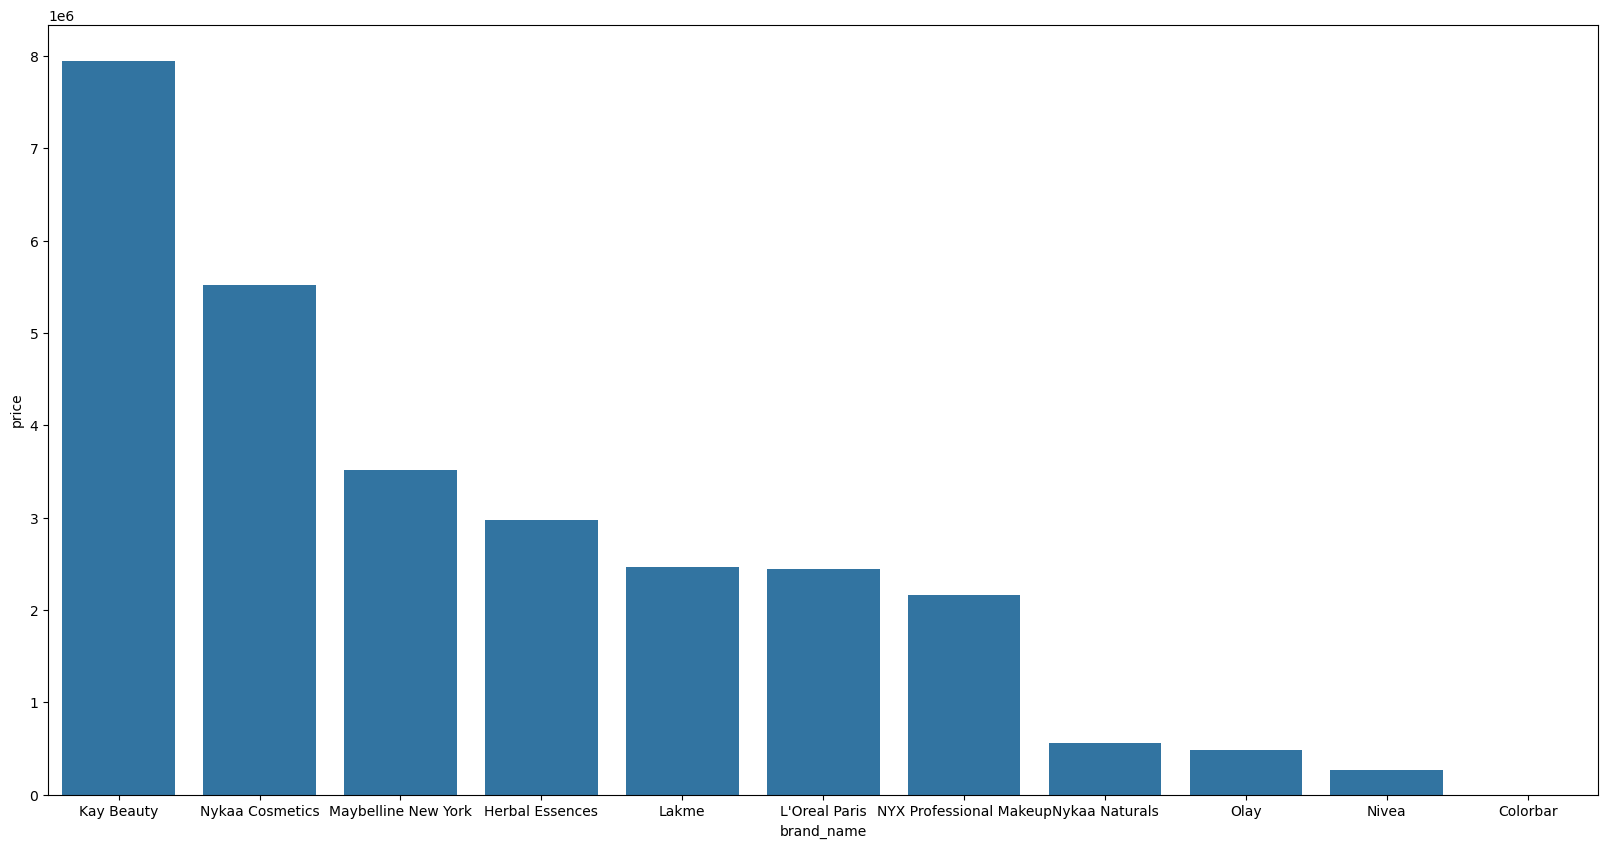

In [22]:
df_revenue_by_brand=df.groupby('brand_name',as_index=False)['price'].sum()
df_revenue_by_brand=df_revenue_by_brand.sort_values(by='price',ascending=False)
df_revenue_by_brand
plt.figure(figsize=(20,10))
sns.barplot(x='brand_name',y='price',data=df_revenue_by_brand)


In [23]:
brand_rating_pivot=df.pivot_table(index=df['brand_name'],values=['product_rating','product_rating_count'],aggfunc=['min','max','count','mean','median'])

In [24]:
brand_rating_pivot

min                                 max  \
                        product_rating product_rating_count product_rating   
brand_name                                                                   
Colorbar                           1.5                    2            1.5   
Herbal Essences                    4.1                   65            4.7   
Kay Beauty                         2.7                    1            4.8   
L'Oreal Paris                      3.7                    4            4.1   
Lakme                              3.3                   10            4.1   
Maybelline New York                3.5                   30            4.1   
NYX Professional Makeup            3.7                   12            4.1   
Nivea                              3.7                   72            4.1   
Nykaa Cosmetics                    2.9                    1            4.1   
Nykaa Naturals                     2.8                    1            4.1   
Olay                               3.8                    6            4.1   

                                                      count  \
                        product_rating_count product_rating   
brand_name                                                    
Colorbar                                   2              1   
Herbal Essences                        11761           6197   
Kay Beauty                             22495          13788   
L'Oreal Paris                           8981           4273   
Lakme                                  11663           6999   
Maybelline New York                    14332           6821   
NYX Professional Makeup                 6672           2954   
Nivea                                   4431            774   
Nykaa Cosmetics                        98477          17652   
Nykaa Naturals                          8310           1426   
Olay                                     920            399   

                                                       mean  \
                        product_rating_count product_rating   
brand_name                                                    
Colorbar                                   1       1.500000   
Herbal Essences                         6197       4.293965   
Kay Beauty                             13788       4.377408   
L'Oreal Paris                           4273       4.054622   
Lakme                                   6999       4.046578   
Maybelline New York                     6821       3.982906   
NYX Professional Makeup                 2954       3.975051   
Nivea                                    774       4.098450   
Nykaa Cosmetics                        17652       3.936308   
Nykaa Naturals                          1426       3.803576   
Olay                                     399       4.028321   

                                                     median  \
                        product_rating_count product_rating   
brand_name                                                    
Colorbar                            2.000000            1.5   
Herbal Essences                  3484.740842            4.3   
Kay Beauty                       6535.440093            4.4   
L'Oreal Paris                    2863.085420            4.1   
Lakme                            4209.332762            4.1   
Maybelline New York              4637.798123            4.1   
NYX Professional Makeup          2699.674340            4.0   
Nivea                            4414.104651            4.1   
Nykaa Cosmetics                 14760.328065            4.0   
Nykaa Naturals                   5248.539972            3.8   
Olay                              637.037594            4.0   

                                              
                        product_rating_count  
brand_name                                    
Colorbar                                 2.0  
Herbal Essences                       2077.0  
Kay Beauty                            4619.0  
L'Oreal Par

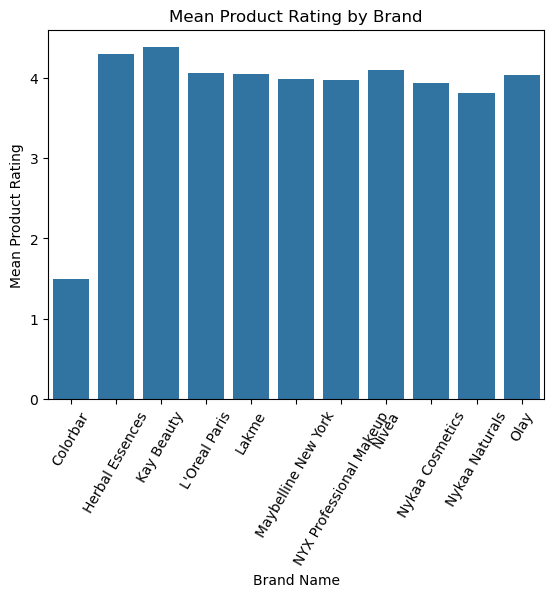

In [25]:
sns.barplot(x=brand_rating_pivot.index, y=brand_rating_pivot[('mean', 'product_rating')])
plt.xlabel('Brand Name')
plt.ylabel('Mean Product Rating')
plt.title('Mean Product Rating by Brand')
plt.xticks(rotation=60)
plt.show()

In [26]:
pivot=df.pivot_table(index='brand_name', values='price', aggfunc='mean')

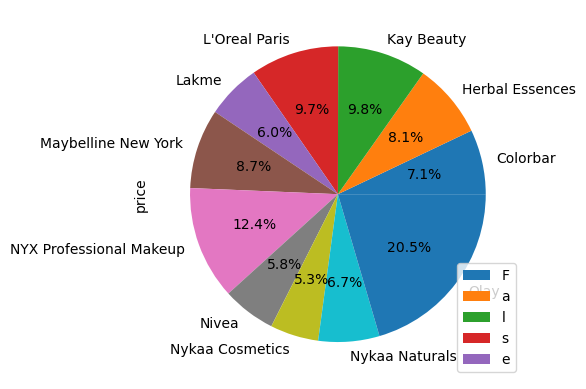

In [27]:
pivot.plot(kind='pie', autopct='%1.1f%%',subplots=True)  
plt.legend('False')
plt.show()

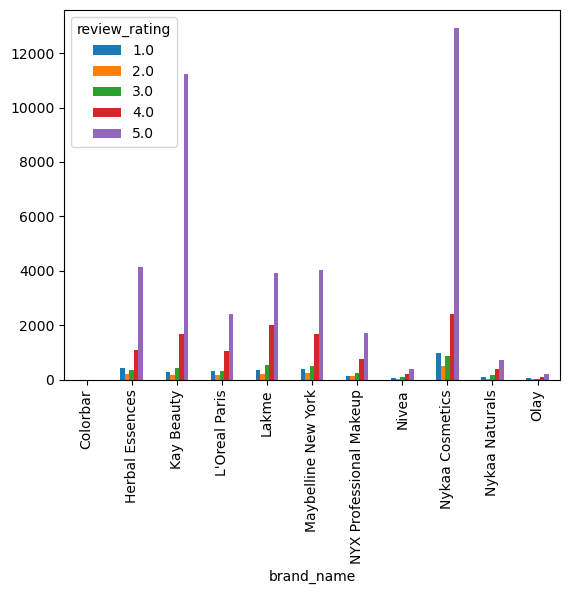

In [28]:
#creates a pivot table from the DataFrame df. This pivot table summarizes data by aggregating the counts of occurrences based on the specified index and columns.
pivot_table = df.pivot_table(index='brand_name', columns='review_rating', aggfunc='size')
#is used to create a bar chart from the pivot table generated earlier. 
pivot_table.plot(kind='bar')
#Displays the pie chart.
plt.show()

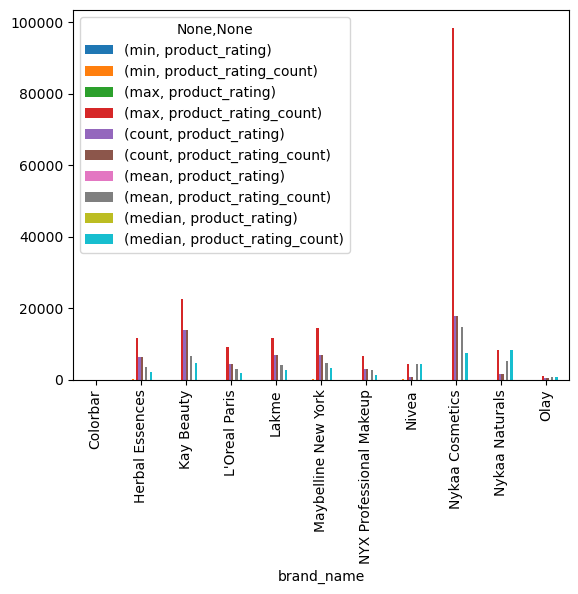

In [29]:
brand_rating_pivot.plot(kind='bar')
#Displays the pie chart.
plt.show()

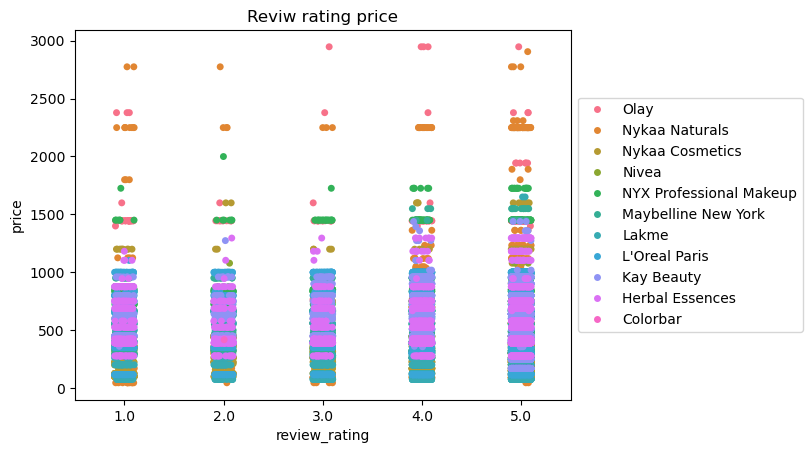

In [30]:
sns.stripplot(x='review_rating',y='price',data=df,hue='brand_name')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Reviw rating price')
plt.show()

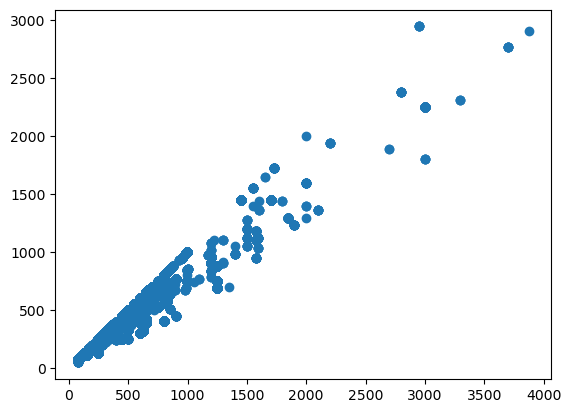

In [31]:
plt.scatter(x='mrp', y='price',data=df)
plt.show()

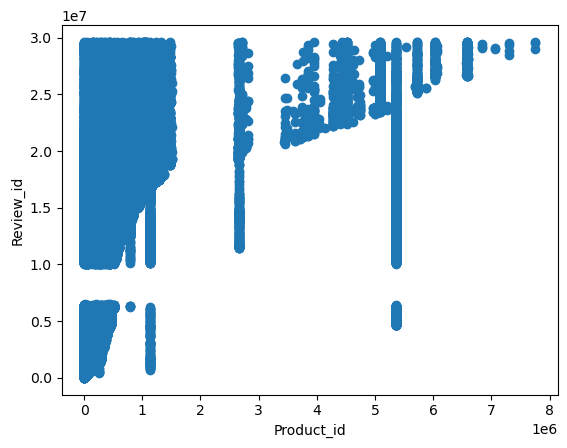

In [32]:
plt.scatter(x='product_id', y='review_id',data=df)
plt.xlabel('Product_id')
plt.ylabel('Review_id')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19004\1199209051.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price,color="r")


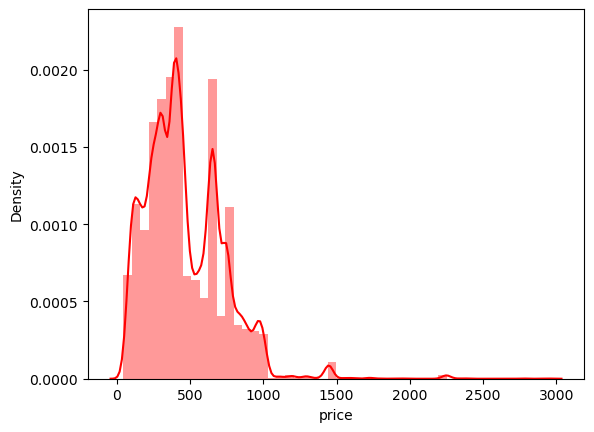

In [33]:
sns.distplot(df.price,color="r")
plt.show()

                           price
brand_name                      
Colorbar                     417
Herbal Essences          2977884
Kay Beauty               7941191
L'Oreal Paris            2439473
Lakme                    2464926
Maybelline New York      3511676
NYX Professional Makeup  2159047
Nivea                     266916
Nykaa Cosmetics          5516130
Nykaa Naturals            561742
Olay                      481743


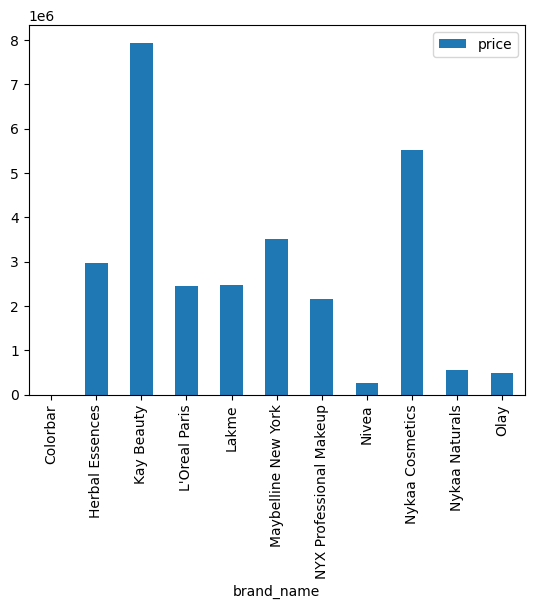

In [34]:
pivot_table = df.pivot_table(index='brand_name', values='price', aggfunc='sum')
print(pivot_table)
pivot_table.plot(kind='bar')
plt.show()

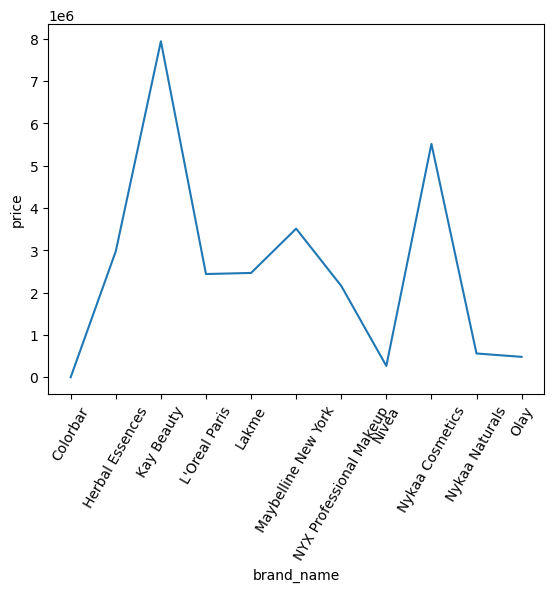

In [35]:
df_agg = df.groupby('brand_name')['price'].sum().reset_index()

# Create the lineplot
sns.lineplot(x='brand_name', y='price', data=df_agg)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=60)

# Show the plot
plt.show()

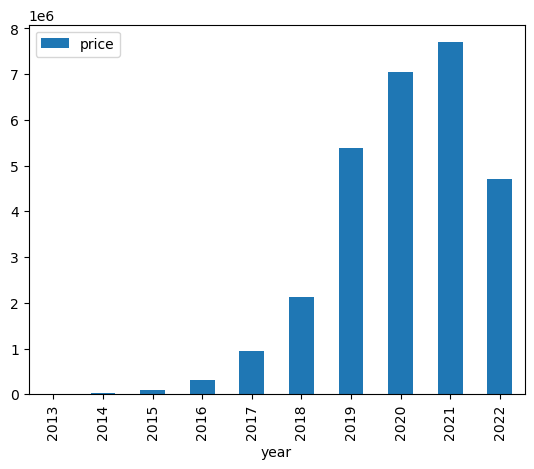

In [36]:
pivot_table = df.pivot_table(index='year', values='price', aggfunc='sum')
pivot_table.plot(kind='bar')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19004\1375455489.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='review_rating',y='year',data=df,palette="Set2")


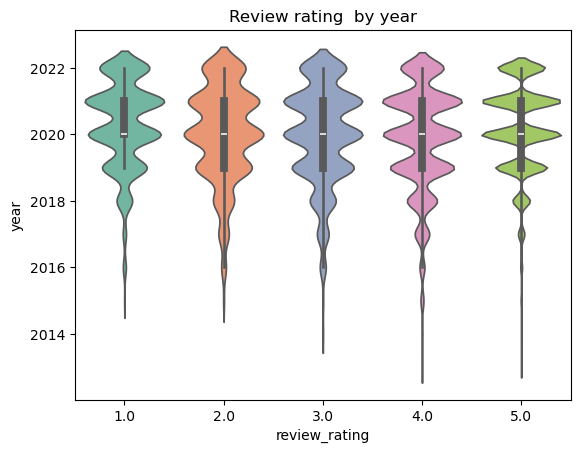

In [37]:
sns.violinplot(x='review_rating',y='year',data=df,palette="Set2")
plt.title('Review rating  by year')
plt.show()

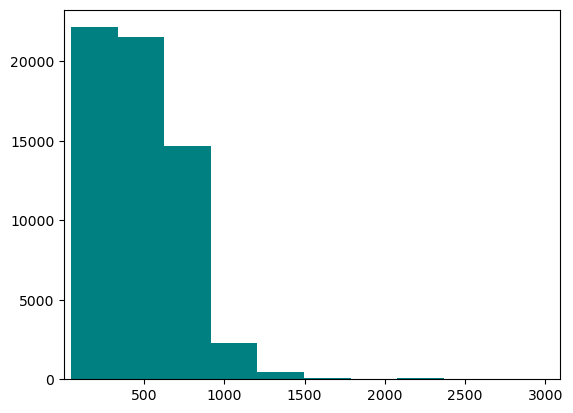

In [38]:
plt.hist(df['price'],color='teal')
plt.xlim(left=1)
#plt.title("sales Range")
#plt.xlabel("Totalsales")
plt.show()

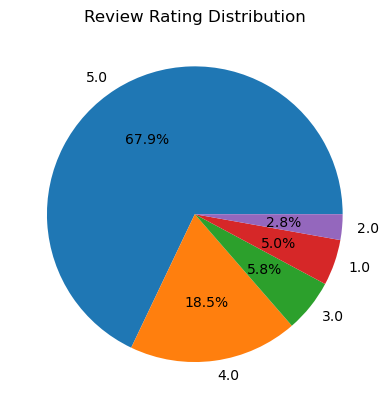

In [39]:
Review = df['review_rating'].value_counts()
# pie chart to represent the gender distribution
plt.pie(Review, labels=Review.index, autopct='%1.1f%%')
plt.title('Review Rating Distribution')
plt.show()

In [40]:
df1=df.drop(['product_id'],axis=1)

<Axes: xlabel='pro_user'>

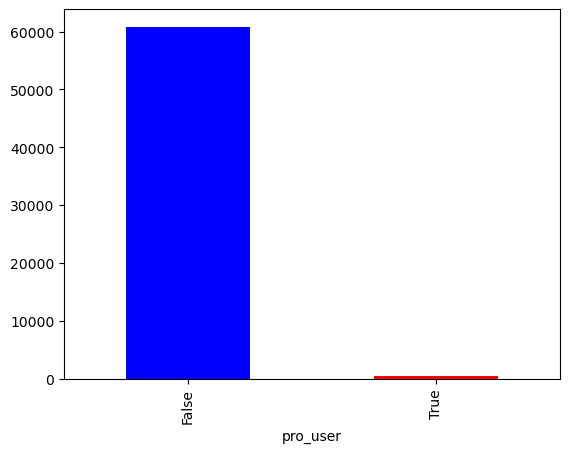

In [41]:
pivot=df.groupby('pro_user').size()
colors=['blue','red']
pivot.plot(kind='bar',color=colors)

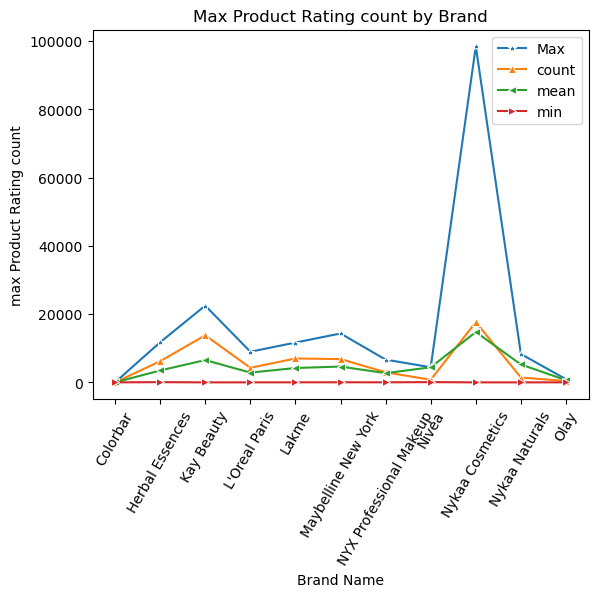

In [42]:
sns.lineplot(x=brand_rating_pivot.index, y=brand_rating_pivot[('max','product_rating_count')],marker='*',label='Max')
sns.lineplot(x=brand_rating_pivot.index, y=brand_rating_pivot[('count','product_rating_count')],marker='^',label='count')
sns.lineplot(x=brand_rating_pivot.index, y=brand_rating_pivot[('mean','product_rating_count')],marker='<',label='mean')
sns.lineplot(x=brand_rating_pivot.index, y=brand_rating_pivot[('min','product_rating_count')],marker='>',label='min')
plt.xlabel('Brand Name')
plt.ylabel('max Product Rating count')
plt.title('Max Product Rating count by Brand')
plt.xticks(rotation=60)
plt.legend()
plt.show()

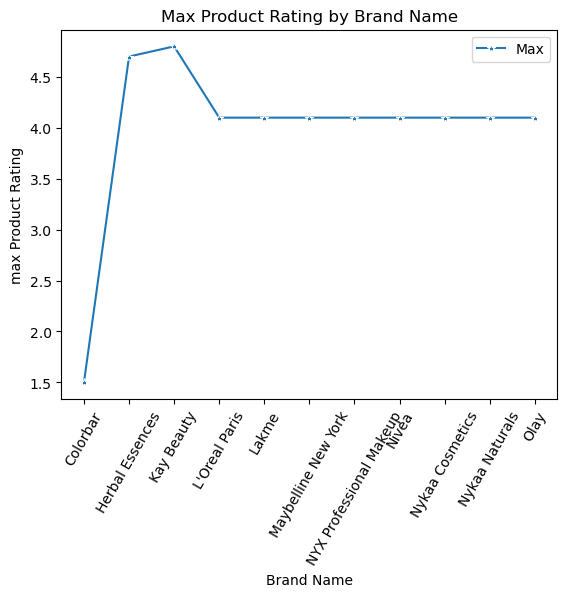

In [43]:
sns.lineplot(x=brand_rating_pivot.index, y=brand_rating_pivot[('max','product_rating')],marker='*',label='Max')
plt.xlabel('Brand Name')
plt.ylabel('max Product Rating')
plt.title('Max Product Rating by Brand Name')
plt.xticks(rotation=60)
plt.legend()
plt.show()

In [63]:

df['review_label'].replace(' ', None, inplace=True)

# Replace values in review_label based on pro_user
df['review_label'] = df.apply(lambda row: 'Verified Buyer' if row['pro_user'] == 'False' else 'Verified Professional' if row['pro_user'] == 'True' else row['review_label'], axis=1)
df['review_label']




C:\Users\Admin\AppData\Local\Temp\ipykernel_19004\3392121169.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review_label'].replace(' ', None, inplace=True)


0        Verified Buyer
1        Verified Buyer
2        Verified Buyer
3        Verified Buyer
4        Verified Buyer
              ...      
61279    Verified Buyer
61280    Verified Buyer
61281    Verified Buyer
61282    Verified Buyer
61283    Verified Buyer
Name: review_label, Length: 61284, dtype: object

In [65]:
df.isnull().sum()

product_id                  0
brand_name                  0
review_id                   0
review_title                0
review_text                 9
author                      0
review_date                 0
review_rating               1
is_a_buyer                  0
pro_user                    0
review_label                0
product_title               0
mrp                         0
price                       0
product_rating              0
product_rating_count        0
product_tags            47782
product_url                 0
year                        0
time_of_day                 0
dtype: int64

In [67]:
# Fill any remaining null (None) values
df['review_label'].fillna('unknown', inplace=True)
df

product_id       brand_name  review_id  \
0          781070             Olay   16752142   
1          781070             Olay   14682550   
2          781070             Olay   15618995   
3          781070             Olay   13474509   
4          781070             Olay   16338982   
...           ...              ...        ...   
61279     1044490  Herbal Essences   17769058   
61280     1044490  Herbal Essences   17766838   
61281     1044490  Herbal Essences   17765866   
61282     1044490  Herbal Essences   17761057   
61283     4633369         Colorbar   25987603   

                              review_title  \
0                     Worth buying 50g one   
1               Best cream to start ur day   
2      perfect for summers dry for winters   
3                        Not a moisturizer   
4                                  Average   
...                                    ...   
61279                                 Good   
61280                                Great   
61281                 Really mild and nice   
61282                     Amazing product!   
61283                             Not good   

                                             review_text          author  \
0      Works as it claims. Could see the difference f...   Ashton Dsouza   
1      It does what it claims . Best thing is it smoo...    Amrit Neelam   
2      I have been using this product for months now....    Sanchi Gupta   
3      i have an oily skin, while this whip acts as a...      Ruchi Shah   
4      It's not that good. Please refresh try for oth...  Sukanya Sarkar   
...                                                  ...             ...   
61279  I use this thrice a week. Has helped me in mak...         Radhesh   
61280  This shampoo has a amazing fragnance and textu...  Shalini Sirohi   
61281  Used it for the first time, feels really fresh...     Sana kanted   
61282  One of the best shampoo which are sulphate and...   neeru chouhan   
61283  It is so irritating so bad i don't like this much          Mssuhv   

              review_date  review_rating  is_a_buyer  pro_user  \
0     2021-01-23 15:17:18            5.0        True     False   
1     2020-09-07 15:30:42            5.0        True     False   
2     2020-11-13 12:24:14            4.0        True     False   
3     2020-06-14 11:56:50            3.0        True     False   
4     2020-12-22 15:24:35            2.0        True     False   
...                   ...            ...         ...       ...   
61279 2021-04-12 13:28:41            5.0        True     False   
61280 2021-04-12 11:47:07            5.0        True     False   
61281 2021-04-12 10:58:34            5.0        True     False   
61282 2021-04-11 21:44:55            5.0        True     False   
61283 2022-06-20 17:41:52            2.0       False     False   

         review_label                                      product_title  \
0      Verified Buyer  Olay Ultra Lightweight Moisturiser: Luminous W...   
1      Verified Buyer  Olay Ultra Lightweight Moisturiser: Luminous W...   
2      Verified Buyer  Olay Ultra Lightweight Moisturiser: Luminous W...   
3      Verified Buyer  Olay Ultra Lightweight Moisturiser: Luminous W...   
4      Verified Buyer  Olay Ultra Lightweight Moisturiser: Luminous W...   
...               ...                                                ...   
61279  Verified Buyer  Herbal Essences Aloe & Eucalyptus Shampoo For ...   
61280  Verified Buyer  Herbal Essences Aloe & Eucalyptus Shampoo For ...   
61281  Verified Buyer  Herbal Essences Aloe & Eucalyptus Shampoo For ...   
61282  Verified Buyer  Herbal Essences Aloe & Eucalyptus Shampoo For ...   
61283  Verified Buyer  Colorbar Mogra Mist - Scent Of An India Temple...   

        mrp  price  product_rating  product_rating_count product_tags  \
0      1999   1599             4.1                    43          NaN   
1      1999   1599             4.1                    43          NaN   
2      1999   1599         

In [45]:
df.isnull().sum()

product_id                  0
brand_name                  0
review_id                   0
review_title                0
review_text                 9
author                      0
review_date                 0
review_rating               1
is_a_buyer                  0
pro_user                    0
review_label                0
product_title               0
mrp                         0
price                       0
product_rating              0
product_rating_count        0
product_tags            47782
product_url                 0
year                        0
time_of_day                 0
dtype: int64

In [46]:
value_counts = df['review_label'].value_counts()
value_counts

review_label
Verified Buyer           60825
Verified Professional      459
Name: count, dtype: int64

<Axes: xlabel='review_label'>

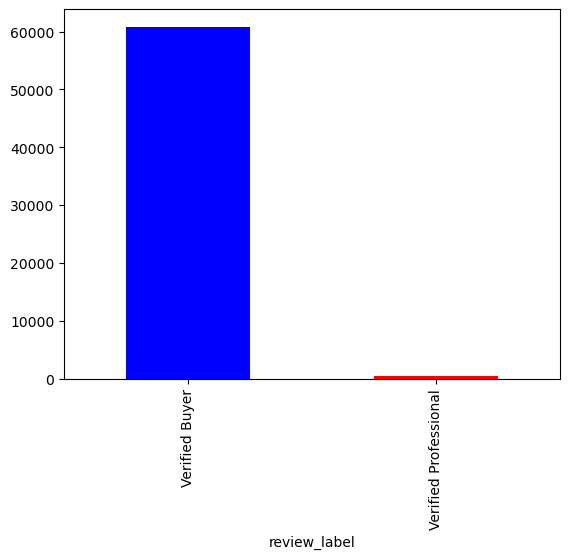

In [47]:
pivot=df.groupby('review_label').size()
colors=['blue','red']
pivot.plot(kind='bar',color=colors)
#plt.gca().spines[['top', 'right',]].set_visible(False)

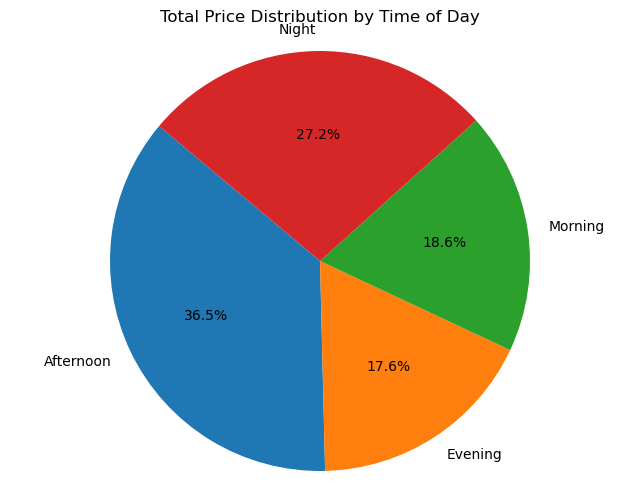

In [48]:
grouped_data = df.groupby('time_of_day')['price'].sum()

# Create a pie plot
plt.figure(figsize=(8, 6))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Price Distribution by Time of Day')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

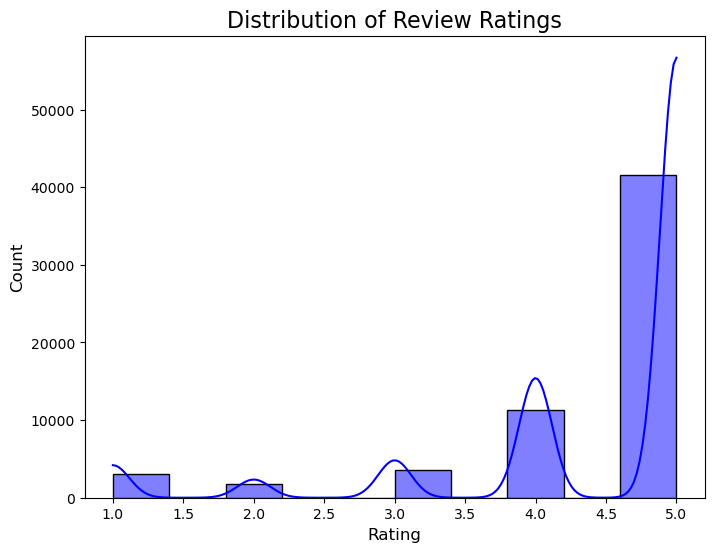

In [49]:
plt.figure(figsize=(8, 6))
sns.histplot(df['review_rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Review Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19004\3767243269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis")


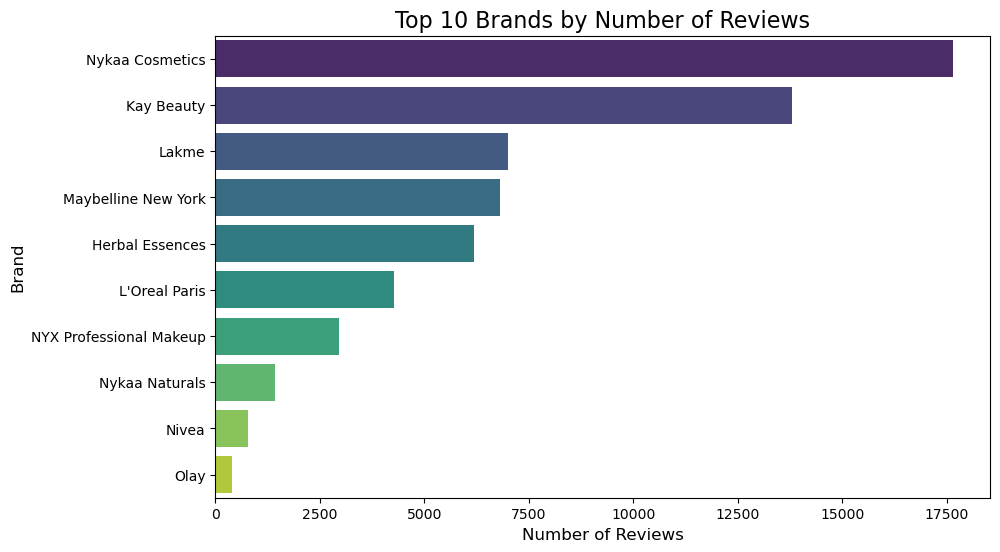

In [50]:
top_brands = df['brand_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis")
plt.title('Top 10 Brands by Number of Reviews', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.show()

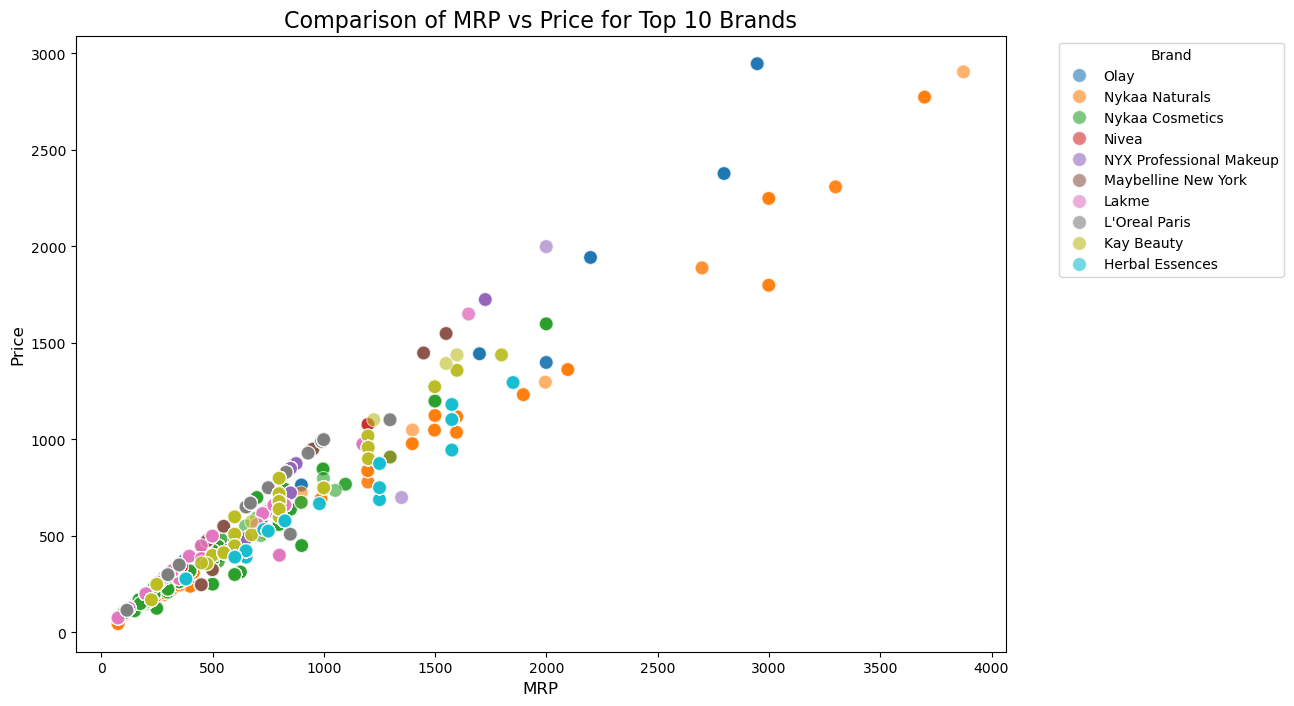

In [51]:
top_brands_mrp_price = df[df['brand_name'].isin(top_brands.index)]
plt.figure(figsize=(12, 8))
sns.scatterplot(x='mrp', y='price', hue='brand_name', data=top_brands_mrp_price, palette="tab10", s=100, alpha=0.6)
plt.title('Comparison of MRP vs Price for Top 10 Brands', fontsize=16)
plt.xlabel('MRP', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

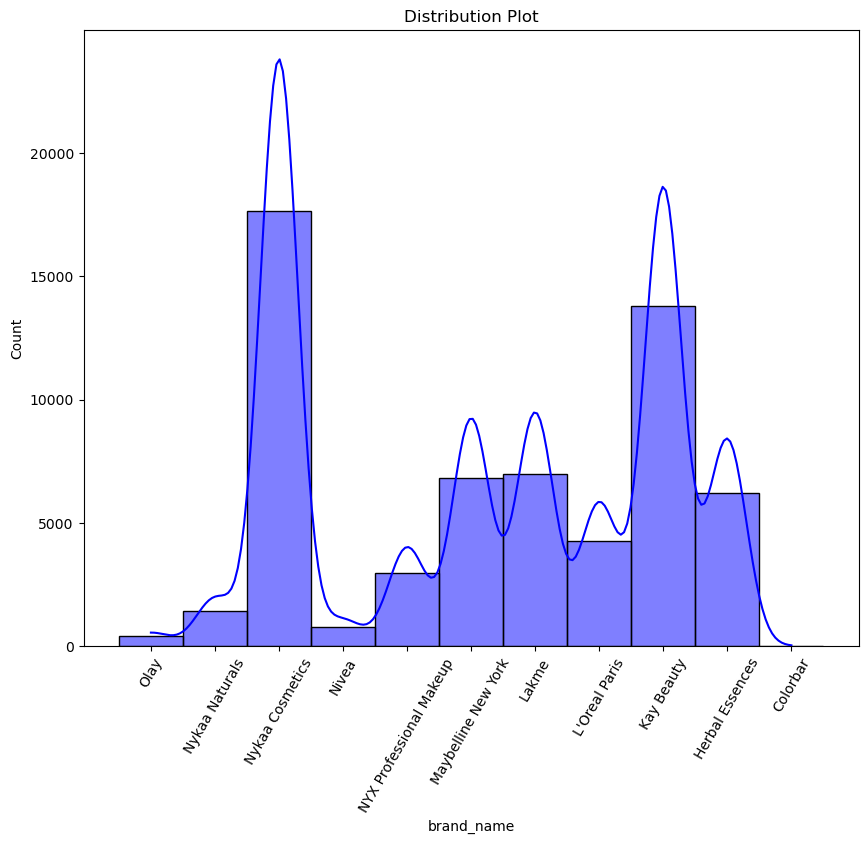

In [52]:
plt.figure(figsize=(10,8))
sns.histplot(df['brand_name'], bins=10, kde=True, color='blue')
plt.title('Distribution Plot')
plt.xticks(rotation=60)
plt.show()

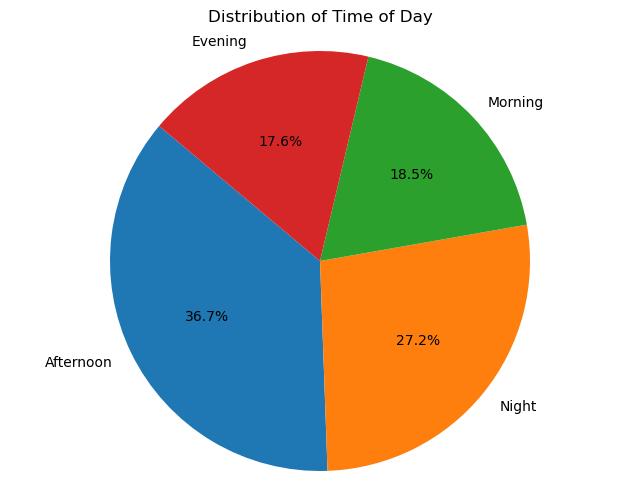

In [53]:
time_of_day_counts = df1['time_of_day'].value_counts()

# Create a pie plot
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.pie(time_of_day_counts, labels=time_of_day_counts.index, autopct='%1.1f%%', startangle=140)

# Set title
plt.title('Distribution of Time of Day')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

In [54]:
df1

brand_name  review_id                         review_title  \
0                 Olay   16752142                 Worth buying 50g one   
1                 Olay   14682550           Best cream to start ur day   
2                 Olay   15618995  perfect for summers dry for winters   
3                 Olay   13474509                    Not a moisturizer   
4                 Olay   16338982                              Average   
...                ...        ...                                  ...   
61279  Herbal Essences   17769058                                 Good   
61280  Herbal Essences   17766838                                Great   
61281  Herbal Essences   17765866                 Really mild and nice   
61282  Herbal Essences   17761057                     Amazing product!   
61283         Colorbar   25987603                             Not good   

                                             review_text          author  \
0      Works as it claims. Could see the difference f...   Ashton Dsouza   
1      It does what it claims . Best thing is it smoo...    Amrit Neelam   
2      I have been using this product for months now....    Sanchi Gupta   
3      i have an oily skin, while this whip acts as a...      Ruchi Shah   
4      It's not that good. Please refresh try for oth...  Sukanya Sarkar   
...                                                  ...             ...   
61279  I use this thrice a week. Has helped me in mak...         Radhesh   
61280  This shampoo has a amazing fragnance and textu...  Shalini Sirohi   
61281  Used it for the first time, feels really fresh...     Sana kanted   
61282  One of the best shampoo which are sulphate and...   neeru chouhan   
61283  It is so irritating so bad i don't like this much          Mssuhv   

              review_date  review_rating  is_a_buyer  pro_user  \
0     2021-01-23 15:17:18            5.0        True     False   
1     2020-09-07 15:30:42            5.0        True     False   
2     2020-11-13 12:24:14            4.0        True     False   
3     2020-06-14 11:56:50            3.0        True     False   
4     2020-12-22 15:24:35            2.0        True     False   
...                   ...            ...         ...       ...   
61279 2021-04-12 13:28:41            5.0        True     False   
61280 2021-04-12 11:47:07            5.0        True     False   
61281 2021-04-12 10:58:34            5.0        True     False   
61282 2021-04-11 21:44:55            5.0        True     False   
61283 2022-06-20 17:41:52            2.0       False     False   

         review_label                                      product_title  \
0      Verified Buyer  Olay Ultra Lightweight Moisturiser: Luminous W...   
1      Verified Buyer  Olay Ultra Lightweight Moisturiser: Luminous W...   
2      Verified Buyer  Olay Ultra Lightweight Moisturiser: Luminous W...   
3      Verified Buyer  Olay Ultra Lightweight Moisturiser: Luminous W...   
4      Verified Buyer  Olay Ultra Lightweight Moisturiser: Luminous W...   
...               ...                                                ...   
61279  Verified Buyer  Herbal Essences Aloe & Eucalyptus Shampoo For ...   
61280  Verified Buyer  Herbal Essences Aloe & Eucalyptus Shampoo For ...   
61281  Verified Buyer  Herbal Essences Aloe & Eucalyptus Shampoo For ...   
61282  Verified Buyer  Herbal Essences Aloe & Eucalyptus Shampoo For ...   
61283             NaN  Colorbar Mogra Mist - Scent Of An India Temple...   

        mrp  price  product_rating  product_rating_count product_tags  \
0      1999   1599             4.1                    43          NaN   
1      1999   1599             4.1                    43          NaN   
2      1999   1599             4.1                    43          NaN   
3      1999   1599             4.1                    43          NaN   
4      1999   1599             4.1                    43          NaN   
...     ...    ...             ...                   ...          

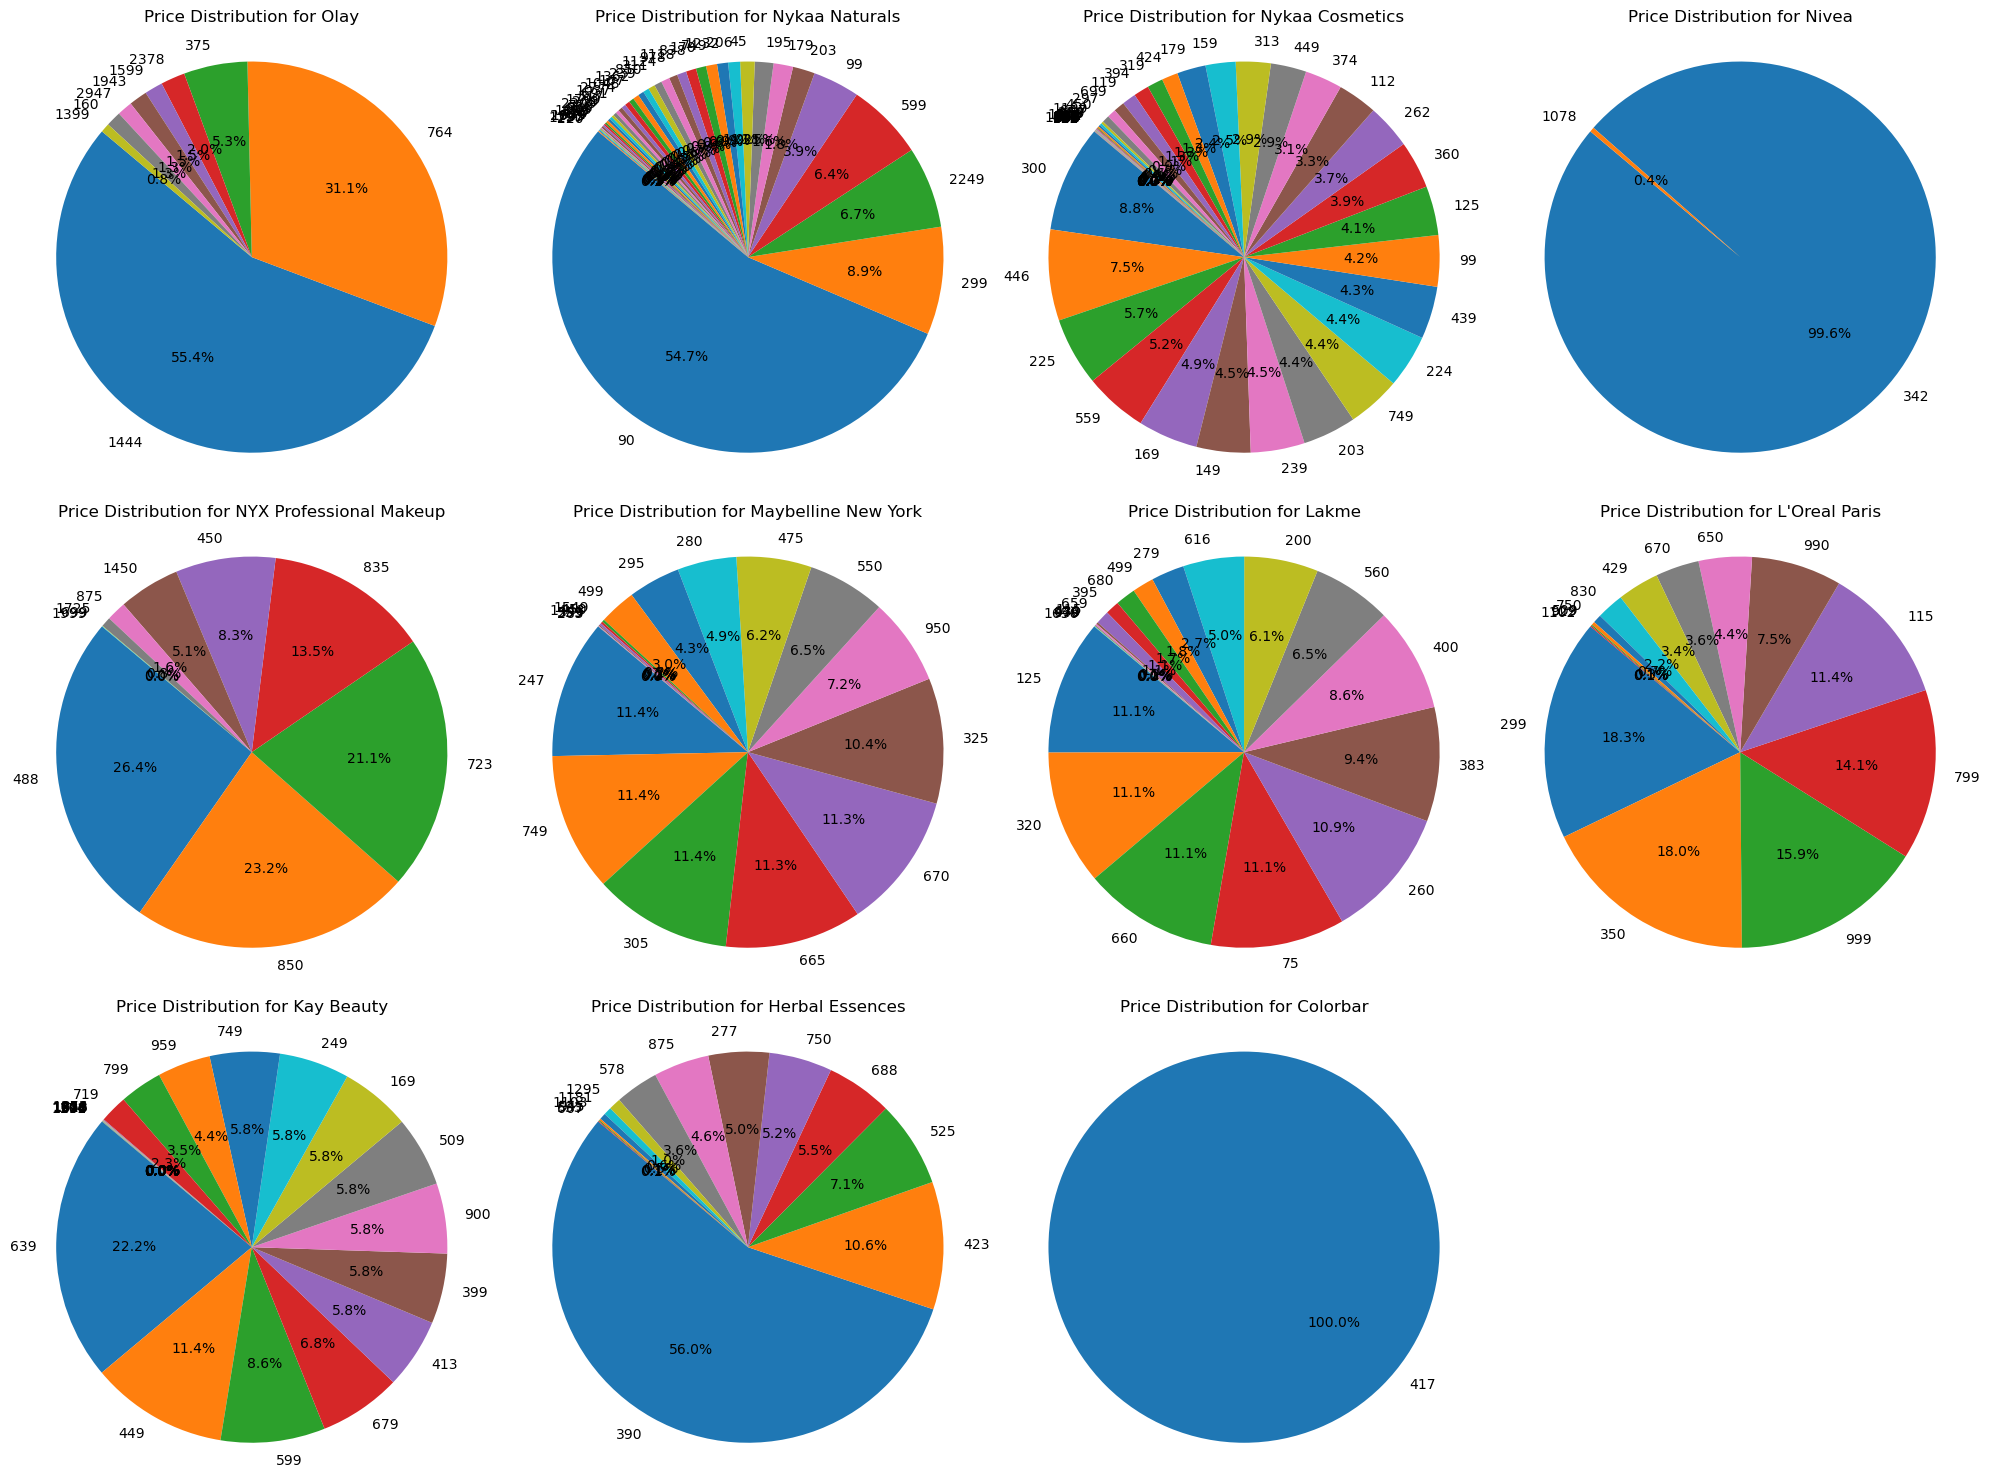

In [55]:
# List of brands to filter
brands = [
    'Olay', 
    'Nykaa Naturals', 
    'Nykaa Cosmetics', 
    'Nivea', 
    'NYX Professional Makeup', 
    'Maybelline New York', 
    'Lakme', 
    "L'Oreal Paris", 
    'Kay Beauty', 
    'Herbal Essences', 
    'Colorbar'
]

# Create a figure with subplots
fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # Adjust the number of rows/columns as needed
axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through brands and create pie charts
for i, brand in enumerate(brands):
    filtered_df = df[df['brand_name'] == brand]
    price_counts = filtered_df['price'].value_counts()

    # Plot pie chart
    axs[i].pie(price_counts, labels=price_counts.index, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Price Distribution for {brand}')
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie chart is circular

# Hide any unused subplots if the number of brands is less than 12
for j in range(len(brands), len(axs)):
    axs[j].axis('off')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


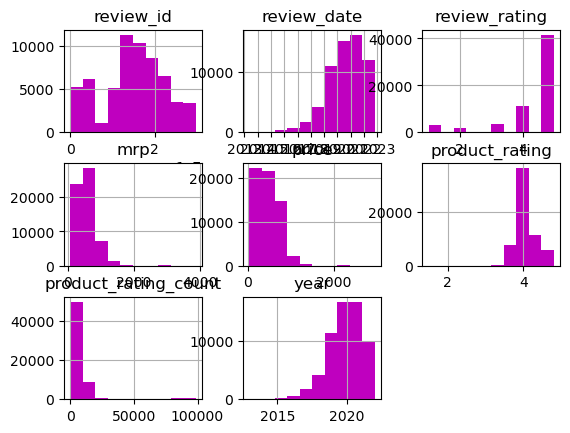

In [56]:
df1.hist(color='m')
plt.show()

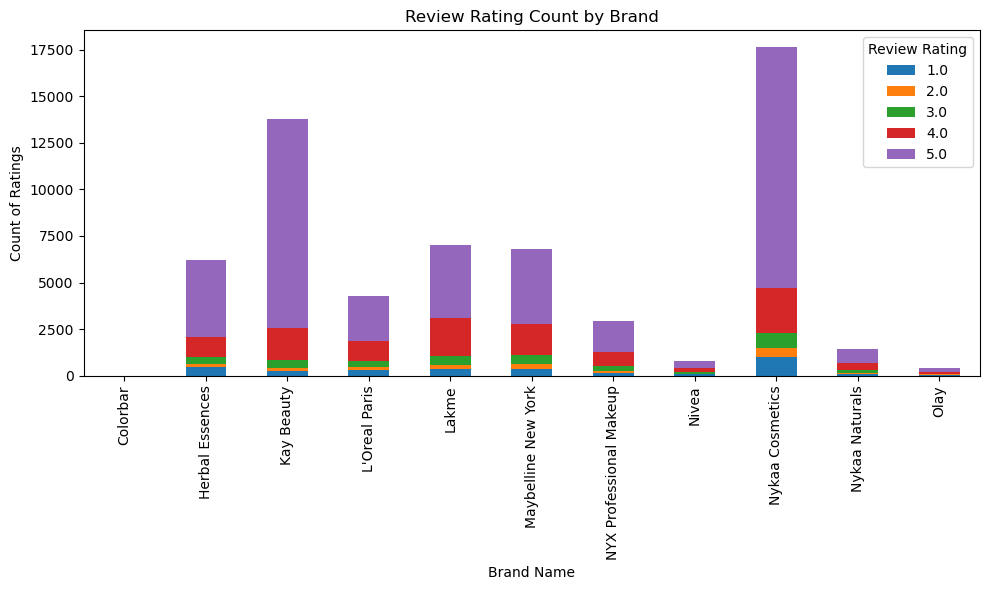

In [57]:
rating_counts = df.groupby(['brand_name', 'review_rating']).size().unstack(fill_value=0)

# Plotting
rating_counts.plot(kind='bar', stacked=True, figsize=(10,6))

# Add labels and title
plt.xlabel('Brand Name')
plt.ylabel('Count of Ratings')
plt.title('Review Rating Count by Brand')

# Show plot
plt.legend(title='Review Rating')
plt.tight_layout()
plt.show()

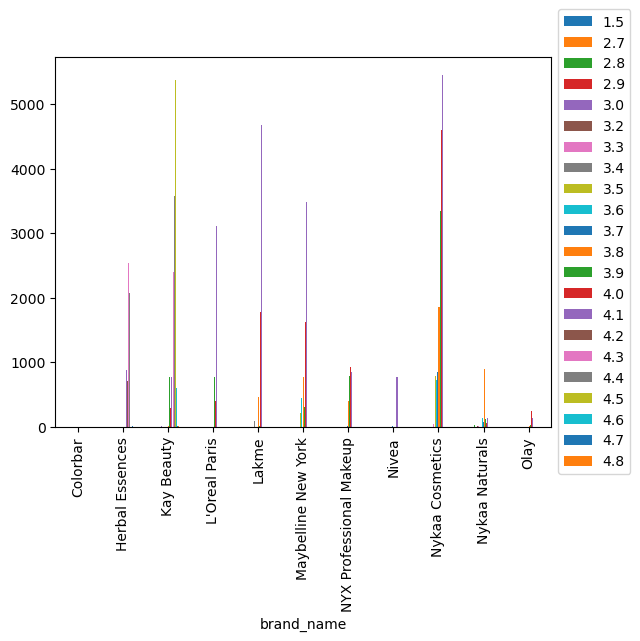

In [58]:
#creates a pivot table from the DataFrame df. This pivot table summarizes data by aggregating the counts of occurrences based on the specified index and columns.
pivot_table = df.pivot_table(index='brand_name', columns='product_rating', aggfunc='size')
#is used to create a bar chart from the pivot table generated earlier. 
pivot_table.plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#Displays the pie chart.
plt.show()

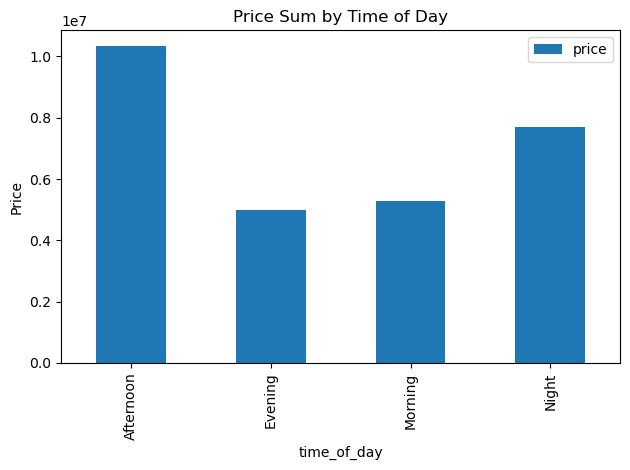

In [59]:
pivot_table = df.pivot_table(index='time_of_day', values='price', aggfunc='sum')

# Plot with custom colors
pivot_table.plot(kind='bar')  # Custom colors for each bar

# Add labels
plt.ylabel('Price')
plt.title('Price Sum by Time of Day')

# Show the plot
plt.tight_layout()
plt.show()